# Assignment 01: Exploratory Data Analysis & Data Preprocessing
### Seasons of Code - AnimAI
---
## Introduction

Welcome to your first assignment for the AnimAI project! In this assignment, you'll work with a dataset containing popularity statistics for various cartoon characters across different countries. This dataset has intentionally been made "messy" with outliers, missing values, and inconsistencies to simulate real-world data challenges.

The skills you learn in this assignment will form the foundation for more advanced machine learning and AI applications in later weeks of the project.

>**Objective**: To perform exploratory data analysis and preprocessing on a cartoon character popularity dataset, applying fundamental concepts of data cleaning, visualization, and statistical analysis.


## Dataset Overview

The dataset `cartoon_popularity_data.csv` contains information about cartoon character popularity across various countries with the following columns:

- `Character`: Name of the cartoon character
- `Country`: Country where the popularity was measured
- `Popularity_Score`: A rating from 0-100 indicating popularity (though some entries may fall outside this range)
- `Avg_Episodes_Watched_Per_Year`: Average number of episodes watched per viewer per year
- `Merchandise_Revenue_MillionUSD`: Revenue generated from character merchandise in millions of USD

First, let's import the necessary libraries and load our dataset:

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better readability
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True

# Load the dataset
file_path = 'cartoon_popularity_data.csv' # Fill here with the path to your dataset

# Check if the file exists
try:
    with open(file_path, 'r') as f:
        pass
except FileNotFoundError:
    print(f"File {file_path} not found. Please check the path and try again.")
    exit()

# Read the dataset
df = pd.read_csv(file_path)

# Display the first few rows
print(f"Dataset shape: {df.shape}")
df.head(20)

Dataset shape: (10000, 5)


,Character,Country,Popularity_Score,Avg_Episodes_Watched_Per_Year,Merchandise_Revenue_MillionUSD
0,Shinchan,Canada,74.06677446676758,80,3.949924724368964
1,Paw Patrol,France,80.58192518328079,48,22.31606244865129
2,SpongeBob SquarePants,Russia,37.853437720835345,127.5,258.92694939230086
3,Motu Patlu,UK,83.41104266407503,50,27.430804382862224
4,Mr Bean,Egypt,76.83135775923722,9,40.715313915210565
5,Mr Bean,Russia,74.49889820916066,100,89.88446547664522
6,Shinchan,China,42.215996679968406,53,47.33693889068305
7,Shinchan,France,29.350012864742613,5,87.70944109744121
8,Motu Patlu,Australia,53.937903011962575,72,60.295513861562675
9,Motu Patlu,Saudi Arabia,48.59904633166138,73,13.710754985476516


## Part 1: Exploratory Data Analysis (EDA)

### Task 1.1: Basic Data Exploration

- Display the shape of the dataset
- Check the data types of each column
- Generate basic statistics using `describe()`
- Check for missing values in each column

In [37]:
# TODO: Your code here
print(f"Dataset shape: {df.shape}")
print(df.dtypes)
print("\nBasic Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset shape: (10000, 5)
Character                         object
Country                           object
Popularity_Score                  object
Avg_Episodes_Watched_Per_Year     object
Merchandise_Revenue_MillionUSD    object
dtype: object

Basic Statistics:
       Character    Country Popularity_Score Avg_Episodes_Watched_Per_Year  \
count      10000       9553             9558                          9933   
unique        50         41             9488                           492   
top     Doraemon  Australia          Unknown                            13   
freq         929        430               71                            93   

       Merchandise_Revenue_MillionUSD  
count                           10000  
unique                          10000  
top                 3.949924724368964  
freq                                1  

Missing Values:
Character                           0
Country                           447
Popularity_Score                  442
Avg_Episodes_W

### Task 1.2: Data Visualization

Create appropriate visualizations to explore the dataset:

1. Distribution of popularity scores (histogram)
2. Average episodes watched by character (bar chart)
3. Merchandise revenue by country (box plot)
4. Correlation heatmap between numerical variables

In [38]:
df_cleaned = df.copy()

numerical_cols = ['Popularity_Score', 'Avg_Episodes_Watched_Per_Year', 'Merchandise_Revenue_MillionUSD']
for col in numerical_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

for col in numerical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

print("Data Types After Cleaning:")
print(df_cleaned.dtypes)

Data Types After Cleaning:
Character                          object
Country                            object
Popularity_Score                  float64
Avg_Episodes_Watched_Per_Year     float64
Merchandise_Revenue_MillionUSD    float64
dtype: object


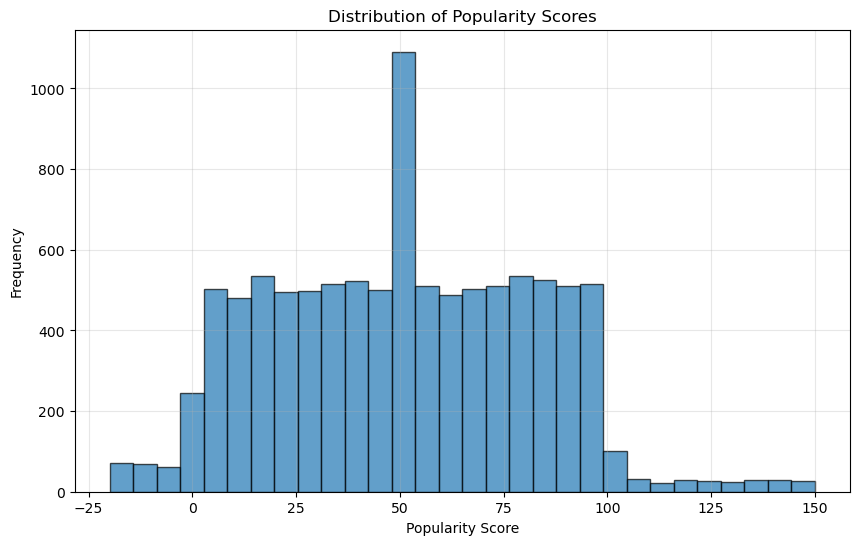

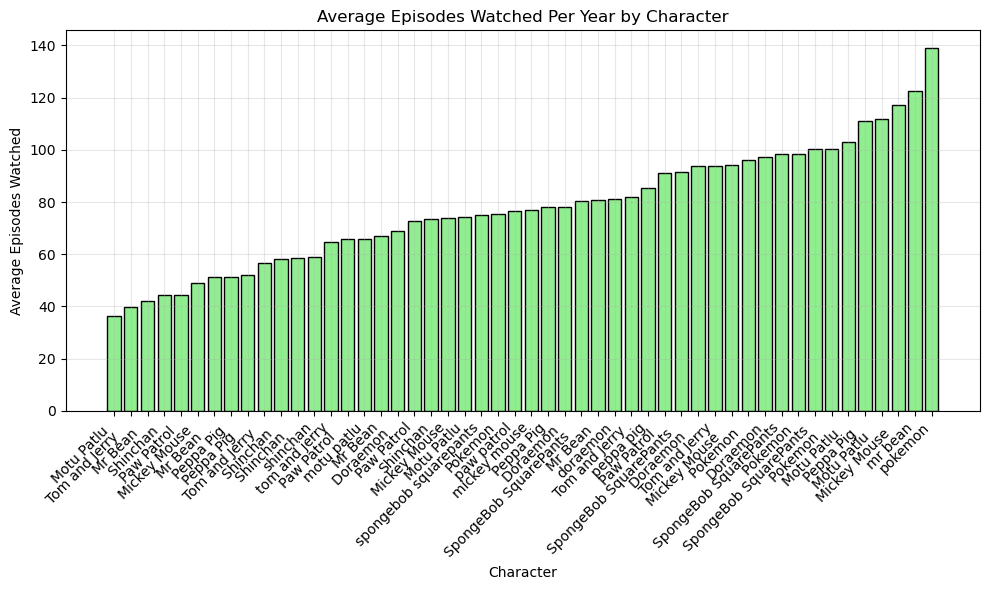

/var/folders/rn/9zkyq6ms2nj9z8pxrnkkfqq40000gn/T/ipykernel_51788/4265315342.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(revenue_by_country, labels=countries, patch_artist=True,


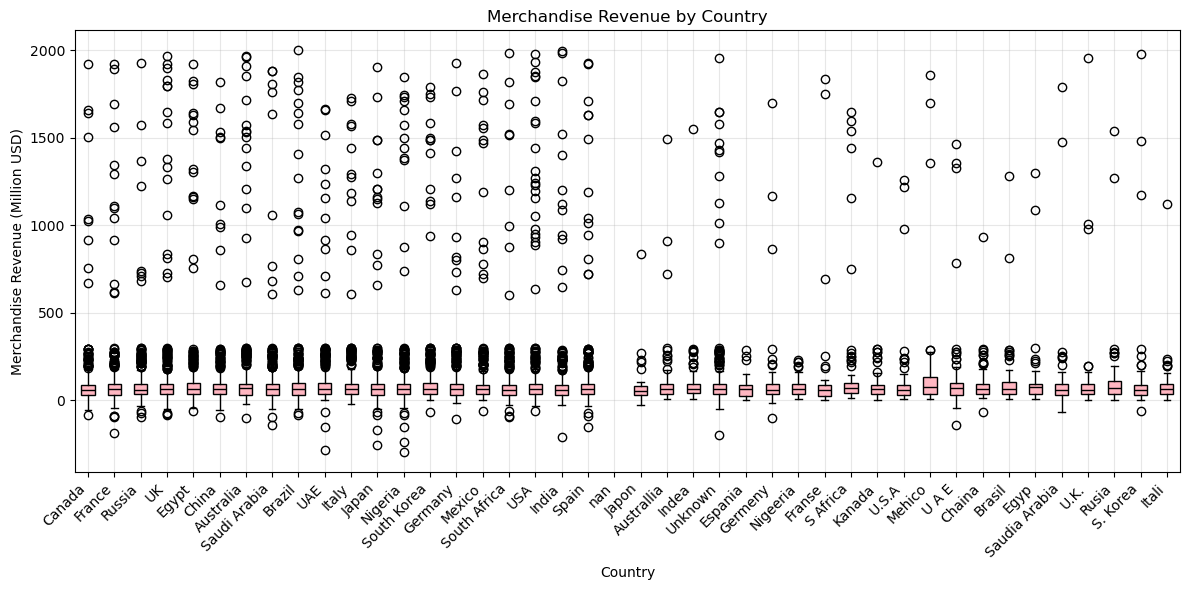

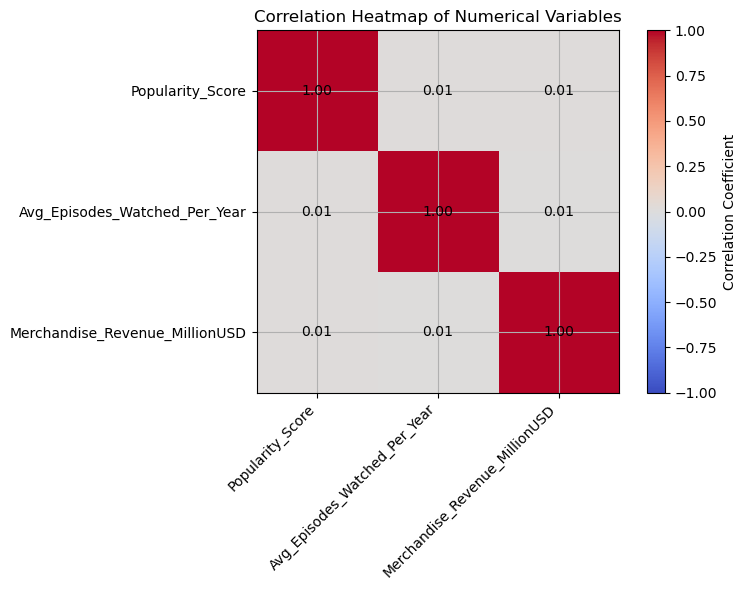

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Popularity_Score'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# 2. Bar Chart of Average Episodes Watched by Character
avg_episodes = df_cleaned.groupby('Character')['Avg_Episodes_Watched_Per_Year'].mean().sort_values()
plt.figure(figsize=(10, 6))
plt.bar(avg_episodes.index, avg_episodes.values, color='#90EE90', edgecolor='black')
plt.title('Average Episodes Watched Per Year by Character')
plt.xlabel('Character')
plt.ylabel('Average Episodes Watched')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Box Plot of Merchandise Revenue by Country
countries = df_cleaned['Country'].unique()
revenue_by_country = [df_cleaned[df_cleaned['Country'] == country]['Merchandise_Revenue_MillionUSD'].values for country in countries]
plt.figure(figsize=(12, 6))
plt.boxplot(revenue_by_country, labels=countries, patch_artist=True, 
            boxprops=dict(facecolor='#FFB6C1', edgecolor='black'),
            medianprops=dict(color='black'))
plt.title('Merchandise Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Merchandise Revenue (Million USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


numerical_cols = ['Popularity_Score', 'Avg_Episodes_Watched_Per_Year', 'Merchandise_Revenue_MillionUSD']

correlation_matrix = df_cleaned[numerical_cols].corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(np.arange(len(numerical_cols)), numerical_cols, rotation=45, ha='right')
plt.yticks(np.arange(len(numerical_cols)), numerical_cols)
for i in range(len(numerical_cols)):
    for j in range(len(numerical_cols)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

### Task 1.3: Identifying Data Issues

Based on your exploration:
- List all data quality issues you've found
- Categorize them (missing values, outliers, inconsistent formats, etc.)
- Explain how each issue might affect your analysis

In [40]:
# TODO: Your code here
print("Unique Characters:", df_cleaned['Character'].unique())
print("\nUnique Countries:", df_cleaned['Country'].unique())

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return len(outliers)

print("\nOutliers in Numerical Columns:")
for col in numerical_cols:
    print(f"{col}: {detect_outliers_iqr(df_cleaned, col)} outliers")

invalid_pop_scores = df_cleaned[(df_cleaned['Popularity_Score'] < 0) | (df_cleaned['Popularity_Score'] > 100)]['Popularity_Score'].count()
print(f"\nInvalid Popularity Scores (outside 0-100): {invalid_pop_scores}")

print("\nData Quality Issues:")
print("1. Missing Values:")
print("   - Original counts: Popularity_Score (442), Country (447)")
print("   -  Missing data")
print("2. Non-Numeric Values:")
print("   - 'Unknown' and other non-numeric entries in numerical columns (e.g., 71 in Popularity_Score).")
print(" ")
print("3. Outliers:")
print("   - Numerical columns have outliers (based on IQR method).")
print(" ")
print("4. Inconsistent Formats:")
print("   - Character names has inconsistent capitalization or spaces.")
print("5. Invalid Values:")
print("   - Popularity_Score values outside 0-100 range.")

Unique Characters: ['Shinchan' 'Paw Patrol' 'SpongeBob SquarePants' 'Motu Patlu' 'Mr Bean'
 'Mickey Mouse' 'Doraemon' 'Pokemon' 'Tom and Jerry' 'Peppa Pig'
 'Mr Bean ' 'mr bean' 'shinchan' 'tom and jerry' 'Tom and Jerry   '
 'SpongeBob SquarePants ' 'mickey mouse' 'Pokemon   ' 'Mickey Mouse  '
 'Tom and Jerry ' 'doraemon' 'Peppa Pig   ' 'Mr Bean   ' 'motu patlu'
 'peppa pig' 'Motu Patlu   ' 'pokemon' 'paw patrol' 'Shinchan  '
 'spongebob squarepants' 'Tom and Jerry  ' 'Shinchan   '
 'SpongeBob SquarePants  ' 'Pokemon  ' 'Motu Patlu ' 'Doraemon '
 'Paw Patrol   ' 'Doraemon   ' 'Peppa Pig ' 'Mickey Mouse '
 'SpongeBob SquarePants   ' 'Mickey Mouse   ' 'Paw Patrol  ' 'Mr Bean  '
 'Shinchan ' 'Motu Patlu  ' 'Paw Patrol ' 'Peppa Pig  ' 'Doraemon  '
 'Pokemon ']

Unique Countries: ['Canada' 'France' 'Russia' 'UK' 'Egypt' 'China' 'Australia'
 'Saudi Arabia' 'Brazil' 'UAE' 'Italy' 'Japan' 'Nigeria' 'South Korea'
 'Germany' 'Mexico' 'South Africa' 'USA' 'India' 'Spain' nan 'Japon'
 'Australlia'

## Part 2: Data Cleaning and Preprocessing

### Task 2.1: Handling Missing Values

Implement strategies to handle missing values in the dataset:

- For categorical columns: Replace with mode or a placeholder
- For numerical columns: Replace with mean, median, or a calculated value
- Document your approach and justify your choices

In [41]:
# TODO: Your code here
df_cleaned['Character'] = df_cleaned['Character'].fillna(df_cleaned['Character'].mode()[0])
df_cleaned['Country'] = df_cleaned['Country'].fillna(df_cleaned['Country'].mode()[0])

print("Missing Values After Cleaning:")
print(df_cleaned.isnull().sum())

print("- Categorical Columns: Filled with mode to preserve the most common category.")
print("- Numerical Columns: Already filled with median in preliminary cleaning to handle non-numeric values and missing data.")

Missing Values After Cleaning:
Character                         0
Country                           0
Popularity_Score                  0
Avg_Episodes_Watched_Per_Year     0
Merchandise_Revenue_MillionUSD    0
dtype: int64
- Categorical Columns: Filled with mode to preserve the most common category.
- Numerical Columns: Already filled with median in preliminary cleaning to handle non-numeric values and missing data.


### Task 2.2: Handling Inconsistent Data

Fix inconsistencies in the dataset:

- Standardize character names (capitalization, extra spaces)
- Correct country name spellings
- Convert any string values in numerical columns to appropriate numeric types

In [ ]:
# TODO: Your code here
df_cleaned['Character'] = df_cleaned['Character'].str.strip().str.title()

# Standardize country names
country_corrections = {
    'Uk': 'UK',
    'United Kingdom': 'UK',
    'Uae': 'UAE',
    'United Arab Emirates': 'UAE',
    'U.K': 'UK' ,
    'U A E' : 'UAE',
    'Mehico' : 'Mexico'
    , 'Usa' : 'USA'

}
df_cleaned['Country'] = df_cleaned['Country'].str.strip().str.title().replace(country_corrections)

# Verify changes
print("\nUnique Characters After Cleaning:", df_cleaned['Character'].unique())
print("\nUnique Countries After Cleaning:", df_cleaned['Country'].unique())


Unique Characters After Cleaning: ['Shinchan' 'Paw Patrol' 'Spongebob Squarepants' 'Motu Patlu' 'Mr Bean'
 'Mickey Mouse' 'Doraemon' 'Pokemon' 'Tom And Jerry' 'Peppa Pig']

Unique Countries After Cleaning: ['Canada' 'France' 'Russia' 'UK' 'Egypt' 'China' 'Australia'
 'Saudi Arabia' 'Brazil' 'UAE' 'Italy' 'Japan' 'Nigeria' 'South Korea'
 'Germany' 'Mexico' 'South Africa' 'USA' 'India' 'Spain' 'Japon'
 'Australlia' 'Indea' 'Unknown' 'Espania' 'Germeny' 'Nigeeria' 'Franse'
 'S Africa' 'Kanada' 'U.S.A' 'Chaina' 'Brasil' 'Egyp' 'Saudia Arabia'
 'U.K.' 'Rusia' 'S. Korea' 'Itali']


### Task 2.3: Outlier Detection and Handling

Detect and handle outliers in numerical columns:

- Use visualization methods (box plots) to identify outliers
- Use statistical methods (Z-score or IQR) to confirm outliers
- Implement an appropriate strategy (capping, removing, or transforming)

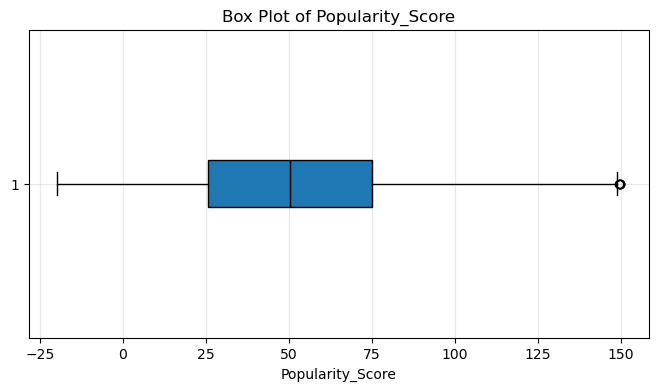

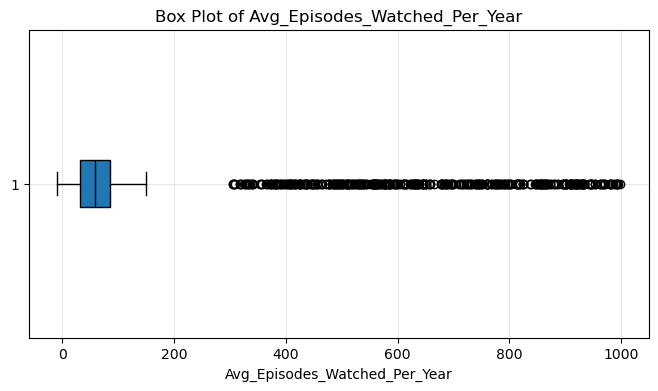

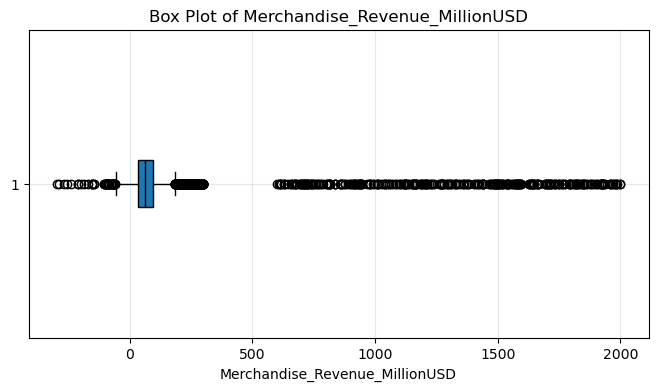


Outliers After Capping:
Popularity_Score: 0 outliers
Avg_Episodes_Watched_Per_Year: 0 outliers
Merchandise_Revenue_MillionUSD: 0 outliers


In [ ]:
# TODO: Your code here

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df_cleaned[col], vert=False, patch_artist=True, 
                boxprops=dict(edgecolor='black'),
                medianprops=dict(color='black'))
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.grid(True, alpha=0.3)
    plt.show()

def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

for col in numerical_cols:
    df_cleaned = cap_outliers(df_cleaned, col)

print("\nOutliers After Capping:")
for col in numerical_cols:
    print(f"{col}: {detect_outliers_iqr(df_cleaned, col)} outliers")

### Task 2.4: Data Transformation

Apply appropriate transformations to prepare the data for analysis:

- Standardize or normalize numerical features if needed
- Create any useful derived features
- Encode categorical variables if necessary

In [51]:
# TODO: Your code here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

df_cleaned['Revenue_Per_Episode'] = df_cleaned['Merchandise_Revenue_MillionUSD'] / (df_cleaned['Avg_Episodes_Watched_Per_Year'] + 1e-6)

df_cleaned = pd.get_dummies(df_cleaned, columns=['Character', 'Country'], drop_first=True)

print("\nTransformed Dataset Head:")
print(df_cleaned.head())


Transformed Dataset Head:
   Popularity_Score  Avg_Episodes_Watched_Per_Year  \
0          0.750315                       0.436812   
1          0.960260                      -0.369943   
2         -0.416625                       1.634340   
3          1.051425                      -0.319521   
4          0.839401                      -1.353177   

   Merchandise_Revenue_MillionUSD  Revenue_Per_Episode  \
0                       -1.269049            -2.905243   
1                       -0.935921             2.529909   
2                        1.992183             1.218951   
3                       -0.843149             2.638797   
4                       -0.602193             0.445022   

   Character_Mickey Mouse  Character_Motu Patlu  Character_Mr Bean  \
0                   False                 False              False   
1                   False                 False              False   
2                   False                 False              False   
3                  

## Part 3: Advanced Analysis (Optional)

### Task 3.1: Multicollinearity Analysis using VIF

Variance Inflation Factor (VIF) helps identify correlated features in your dataset:

> You'll need to install statsmodels first: `pip install statsmodels`

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a new dataframe with only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(len(numeric_df.columns))]

print(vif_data)

Empty DataFrame
Columns: [feature, VIF]
Index: []


> **Note**: VIF values > 5 indicate high multicollinearity. [Learn more about VIF here](https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/)

### Task 3.2: Dimensionality Reduction with PCA (Optional)

If you'd like to explore dimensionality reduction:
> **Note**: [Learn more about PCA here](https://www.kaggle.com/code/vipulgandhi/pca-beginner-friendly-detailed-explanation)

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

ValueError: at least one array or dtype is required

## Part 4: Conclusion and Documentation

### Task 4.1: Summarize Your Findings

Write a summary of:
- The initial state of the data
- All issues identified
- Methods used to address each issue
- The final state of the cleaned dataset
- Any insights gained during the process

### Task 4.2: Save Your Cleaned Dataset

Save your cleaned and preprocessed dataset:

In [ ]:
# TODO: Your code here


# END OF TODO
df_cleaned.to_csv('cartoon_popularity_cleaned.csv', index=False)

## Submission Guidelines

1. Submit your completed Jupyter notebook (.ipynb file)
2. Include the original and cleaned datasets
3. Make sure all code cells are executed and outputs are visible
4. Add appropriate markdown cells explaining your approach and findings
5. Ensure your notebook is well-organized and follows a logical flow



## Resources

### Pandas and Data Manipulation
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [10 Minutes to Pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
- [Kaggle: Pandas Tutorial](https://www.kaggle.com/learn/pandas)

### Data Visualization
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html)
- [Kaggle: Data Visualization](https://www.kaggle.com/learn/data-visualization)

### Data Cleaning and Preprocessing
- [Handling Missing Values](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b)
- [Outlier Detection Methods](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
- [GeeksforGeeks: Data Preprocessing](https://www.geeksforgeeks.org/data-preprocessing-in-data-mining/)

### Advanced Topics
- [Understanding VIF](https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/)
- [PCA Explained](https://www.kaggle.com/code/vipulgandhi/pca-beginner-friendly-detailed-explanation)

---

**Good luck with your assignment! Remember, data preprocessing is an art as much as it is a science – there are often multiple valid approaches to handle data issues, so freely use your intution wherever you need.**